In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Training Features: 1456 samples

In [2]:
rawfeats = pd.read_csv('data/dengue_features_train.csv')
print(rawfeats.shape)
rawfeats.head()

(1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


### Training Labels

In [3]:
rawlabels = pd.read_csv('data/dengue_labels_train.csv')
print(rawlabels.shape)
rawlabels.head()

(1456, 4)


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


### Test Features: 416 samples

In [4]:
testfeats = pd.read_csv('data/dengue_features_test.csv')
print(testfeats.shape)
testfeats.head()

(416, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


### There are two cities in the dataset, in similar proportions in both test and train data

In [5]:
rawlabels.groupby('city').agg('count')

,year,weekofyear,total_cases
city,,,
iq,520,520,520
sj,936,936,936


In [6]:
testfeats.groupby('city')[['year','weekofyear']].agg('count')

,year,weekofyear
city,,
iq,156,156
sj,260,260


### Our target variable is not normal, resembling perhaps a poisson or negative binomial distribution

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


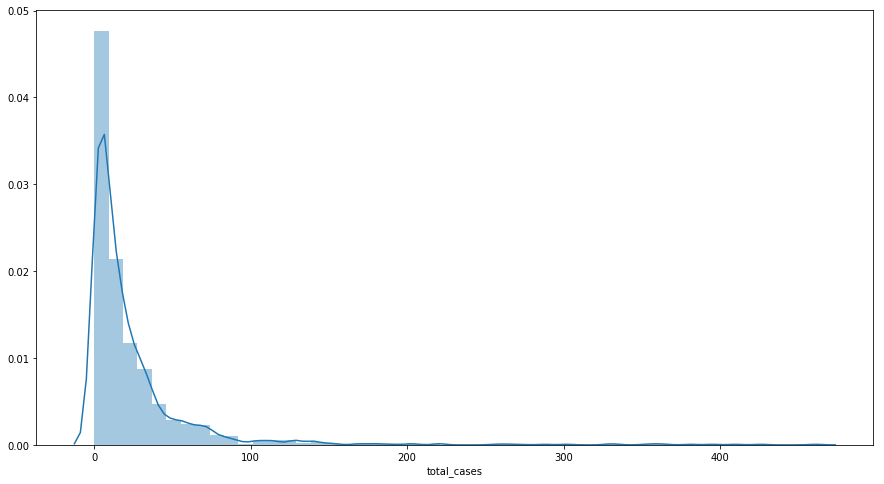

In [7]:
#outcome variable
plt.figure(figsize=[15,8])
sns.distplot(rawlabels.total_cases, bins=50)
plt.show()

# Feature Analysis: viewing distributions in both train and test features

## Time

#### Observations in are taken relatively uniformly throughout the year

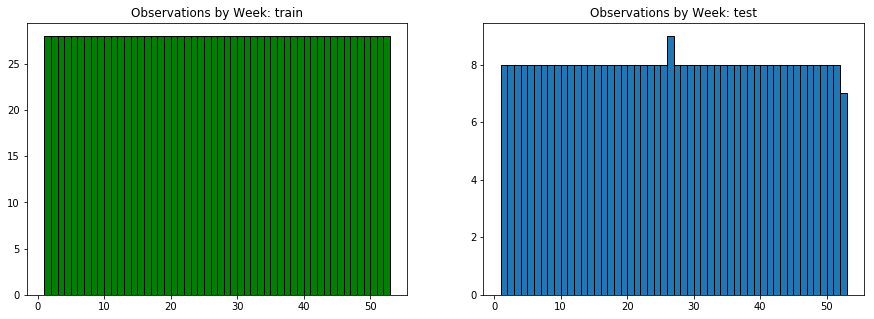

In [8]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.hist(rawfeats.weekofyear, bins=52, 
         ec='black',color='green')
plt.title('Observations by Week: train')
plt.subplot(122)
plt.hist(testfeats.weekofyear, bins=52,ec='black',)
plt.title('Observations by Week: test')

plt.show()

#### Later Years have more observations

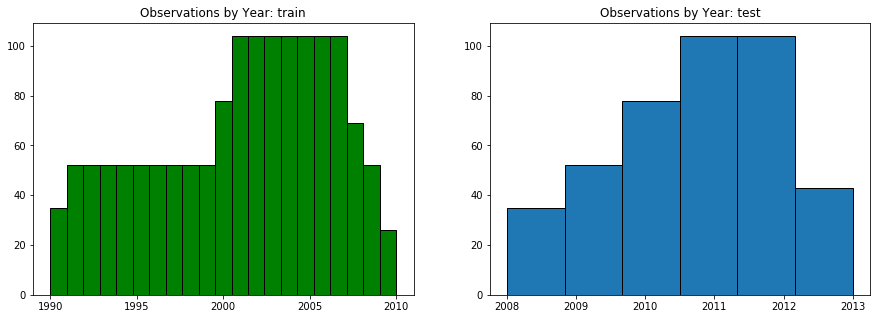

In [9]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.hist(rawfeats.year, ec='black', color='green',
         bins=rawfeats.year.nunique())
plt.xticks(labels=[1990,1995,2000,2005,2010], 
          ticks=[1990,1995,2000,2005,2010])
plt.title('Observations by Year: train')
plt.subplot(122)
plt.hist(testfeats.year, ec='black',
         bins=testfeats.year.nunique())
plt.title('Observations by Year: test')
plt.show()

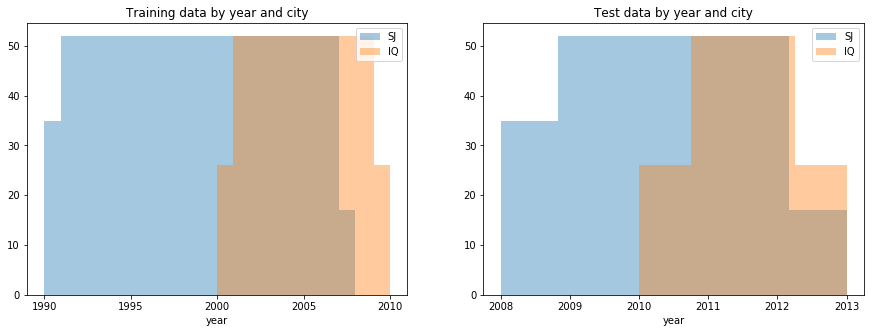

In [21]:
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.distplot(a=rawfeats[rawfeats.city=='sj']['year'],
            bins=rawfeats[rawfeats.city=='sj']['year'].nunique(),
            kde=False, label='SJ')
sns.distplot(a=rawfeats[rawfeats.city=='iq']['year'],
            bins=rawfeats[rawfeats.city=='iq']['year'].nunique(),
            kde=False, label='IQ')
plt.xticks(labels=[1990,1995,2000,2005,2010], 
          ticks=[1990,1995,2000,2005,2010])
plt.title('Training data by year and city')
plt.legend()

plt.subplot(122)
sns.distplot(a=testfeats[testfeats.city=='sj']['year'],
            bins=testfeats[testfeats.city=='sj']['year'].nunique(),
            kde=False, label='SJ')
sns.distplot(a=testfeats[testfeats.city=='iq']['year'],
            bins=testfeats[testfeats.city=='iq']['year'].nunique(),
            kde=False, label='IQ')
plt.title('Test data by year and city')
plt.legend()
plt.show()


#To Add: Population

## Temperature: NOAA GHCN daily climate data

#### In some cases, the training data has outlier temperatures that are not observed in the test data. Removing or shifting these may be something to explore

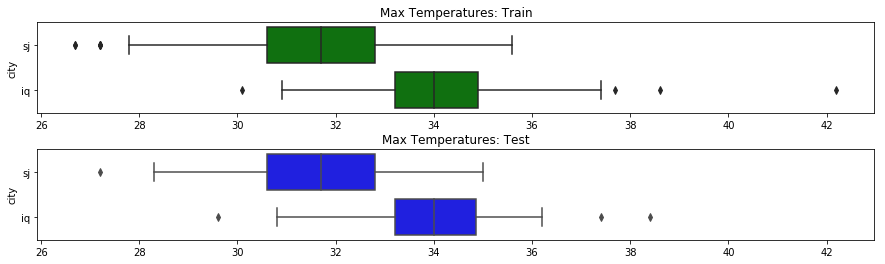

In [10]:
#MAX TEMPERATURES
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='station_max_temp_c', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Max Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
sns.boxplot(x='station_max_temp_c', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.title('Max Temperatures: Test')
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

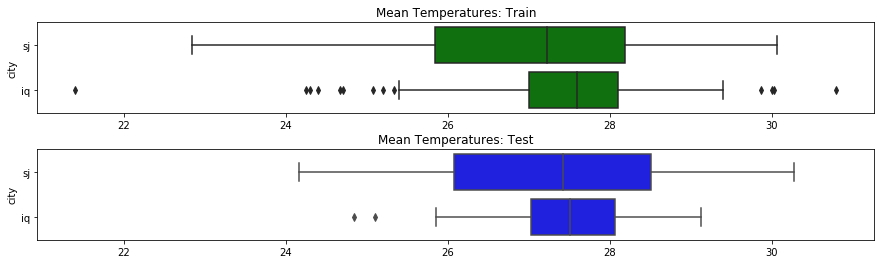

In [11]:
#MEAN TEMPERATURES
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='station_avg_temp_c', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Mean Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
sns.boxplot(x='station_avg_temp_c', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.title('Mean Temperatures: Test')
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

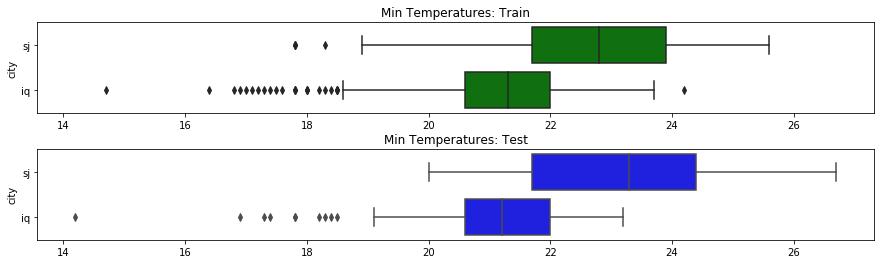

In [12]:
#MIN TEMPERATURES
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='station_min_temp_c', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Min Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('Min Temperatures: Test')
sns.boxplot(x='station_min_temp_c', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

## Temperature: NOAA's NCEP Climate Forecast System Reanalysis

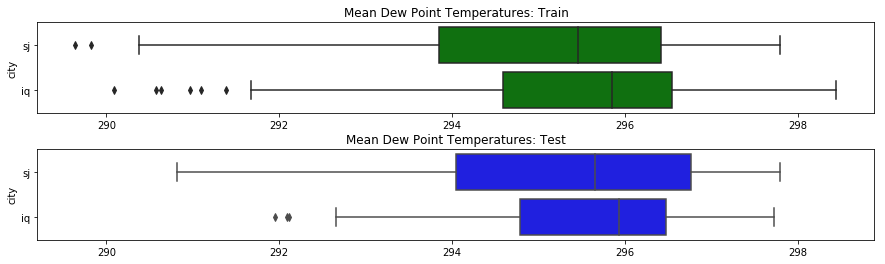

In [13]:
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='reanalysis_dew_point_temp_k', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Mean Dew Point Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('Mean Dew Point Temperatures: Test')
sns.boxplot(x='reanalysis_dew_point_temp_k', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

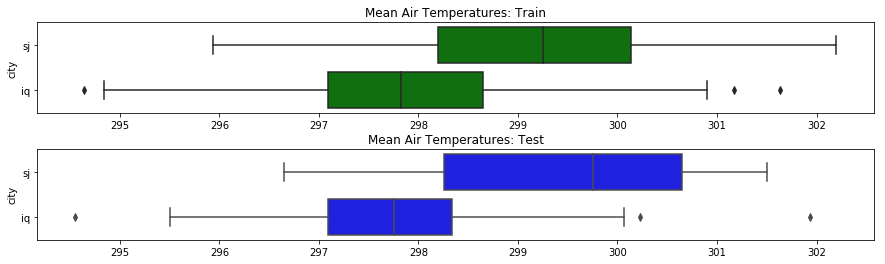

In [14]:
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='reanalysis_air_temp_k', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Mean Air Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('Mean Air Temperatures: Test')
sns.boxplot(x='reanalysis_air_temp_k', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

#### Each city has a temperature cycle that could perhaps be engineered into a seasonal feature

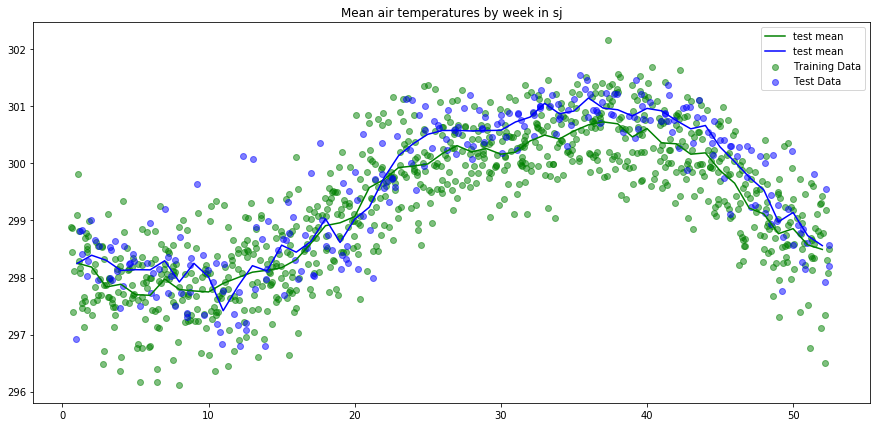

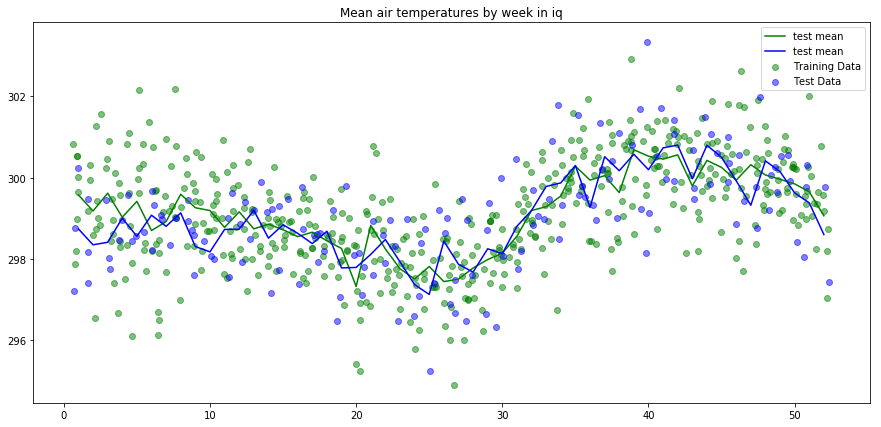

In [15]:
v = 'reanalysis_avg_temp_k'
c = 'sj'

plt.figure(figsize=[15,7])
plt.title('Mean air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='train mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

c='iq'
plt.figure(figsize=[15,7])
plt.title('Mean air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

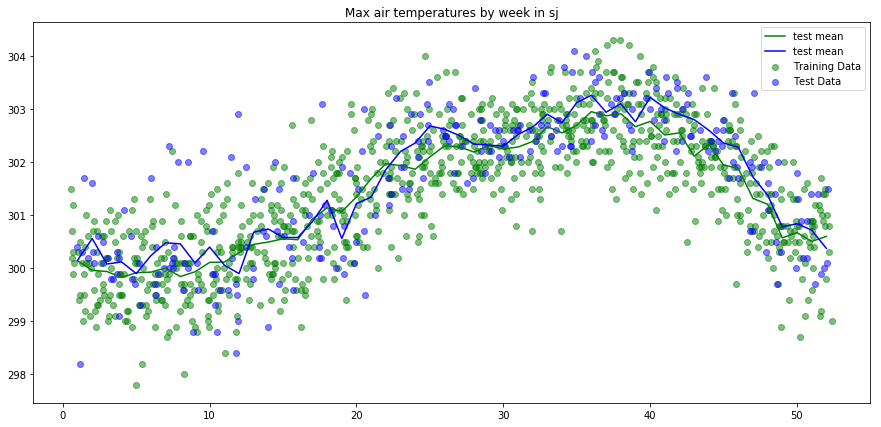

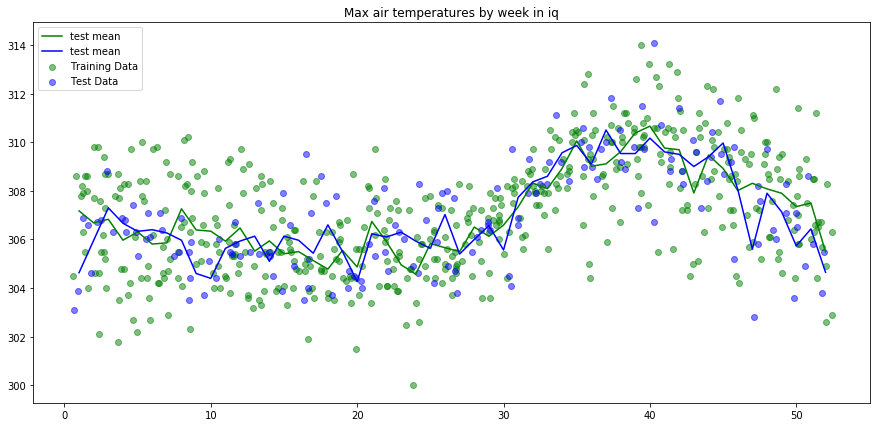

In [16]:
v = 'reanalysis_max_air_temp_k'
c = 'sj'

plt.figure(figsize=[15,7])
plt.title('Max air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

c='iq'
plt.figure(figsize=[15,7])
plt.title('Max air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

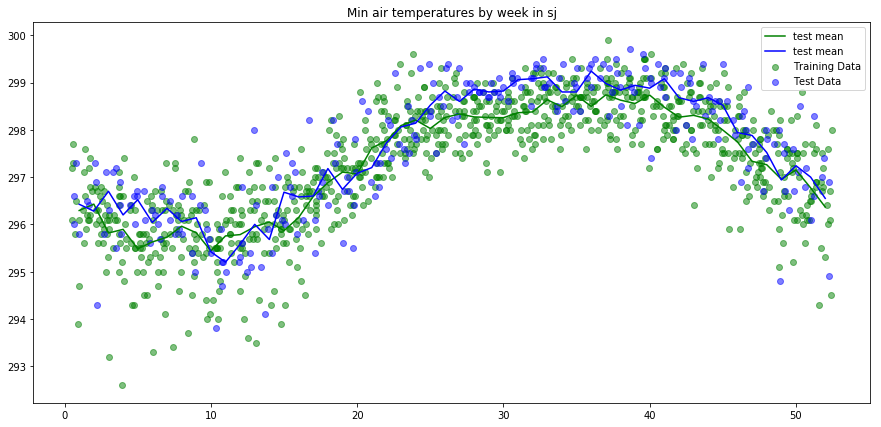

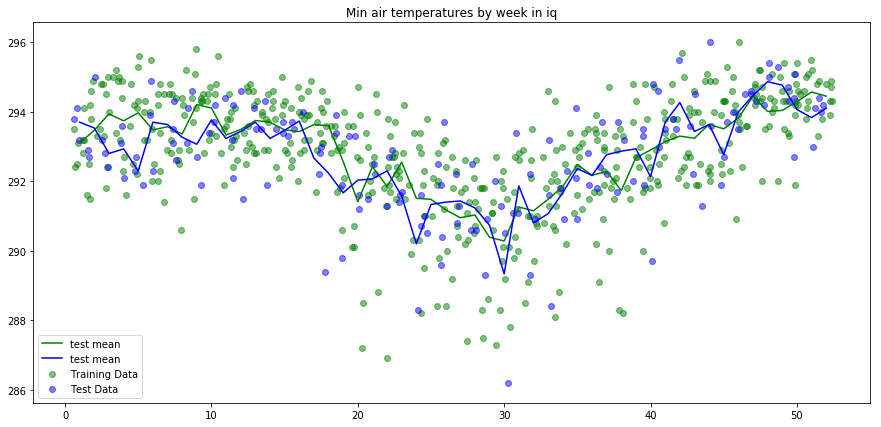

In [17]:
v = 'reanalysis_min_air_temp_k'
c = 'sj'

plt.figure(figsize=[15,7])
plt.title('Min air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

c='iq'
plt.figure(figsize=[15,7])
plt.title('Min air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

#### One of the cities also has some seasons with larger daily swings in temperature, which could impact mosquito populations and is also worth extracting as a feature

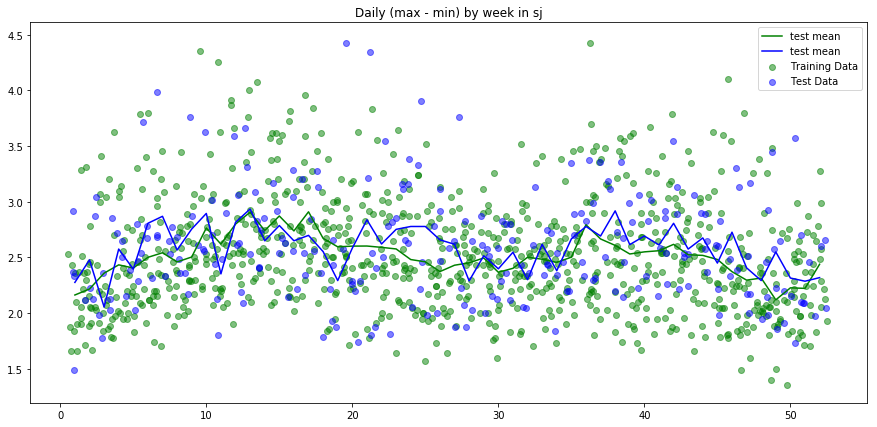

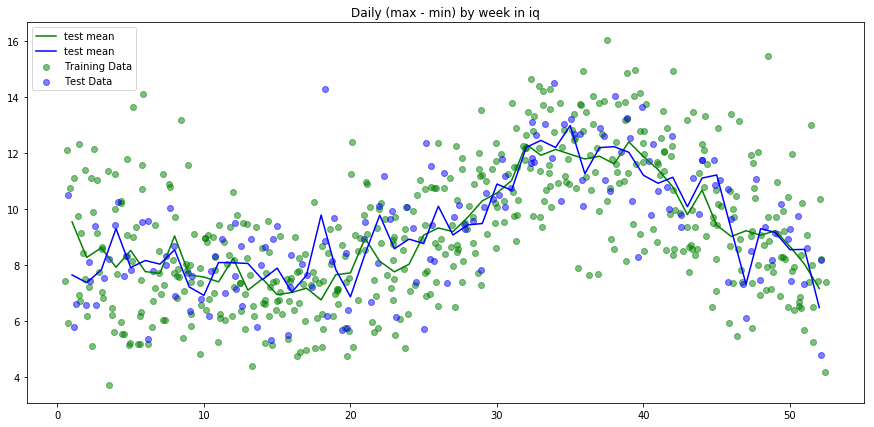

In [18]:
v = 'reanalysis_tdtr_k'
c = 'sj'

plt.figure(figsize=[15,7])
plt.title('Daily (max - min) by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='train mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

c='iq'
plt.figure(figsize=[15,7])
plt.title('Daily (max - min) by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

## Rain: PERSIANN Satellite at a .25x.25 degree scale

#### Again, we see some training outliers in each city that may be worth capping or removing

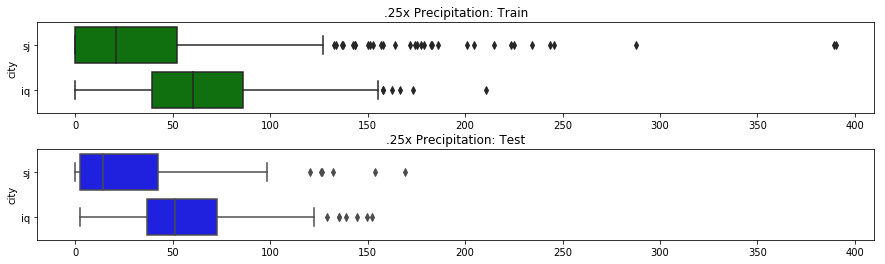

In [19]:
#Rain
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='precipitation_amt_mm', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('.25x Precipitation: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('.25x Precipitation: Test')
sns.boxplot(x='precipitation_amt_mm', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

## Rain: NOAA's NCEP Climate Forecast System REanalysis at a .5x.5 degree scale

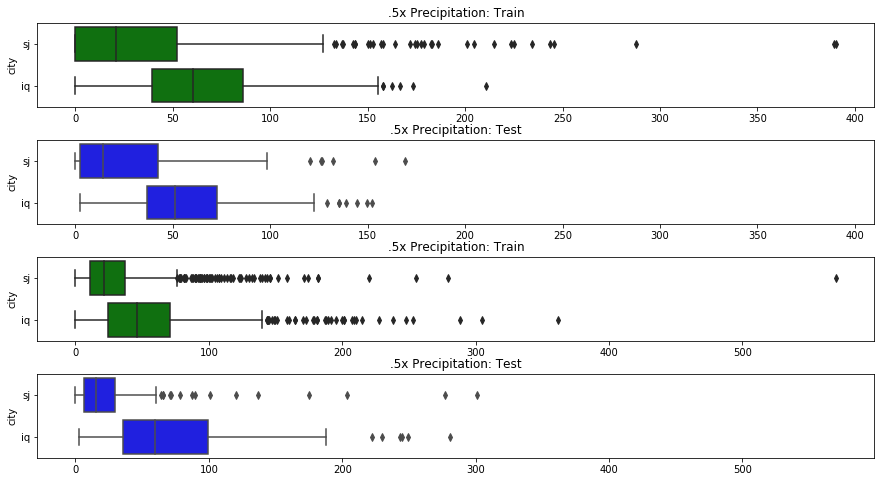

In [20]:
#Rain
fig = plt.figure(figsize=[15,8])
ax1 = plt.subplot(411)
sns.boxplot(x='reanalysis_sat_precip_amt_mm', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('.5x Precipitation: Train')
ax2 = plt.subplot(412, sharex=ax1)
plt.title('.5x Precipitation: Test')
sns.boxplot(x='reanalysis_sat_precip_amt_mm', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)

ax3 = plt.subplot(413)
sns.boxplot(x='reanalysis_precip_amt_kg_per_m2', y='city',
            color='green', data=rawfeats, ax=ax3)
plt.xlabel('')
plt.title('.5x Precipitation: Train')

ax4 = plt.subplot(414, sharex=ax3)
plt.title('.5x Precipitation: Test')
sns.boxplot(x='reanalysis_precip_amt_kg_per_m2', y='city',
            color='blue', data=testfeats, ax=ax4)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()


## Humidity: NOAA's NCEP Climate Forecast System Reanalysis

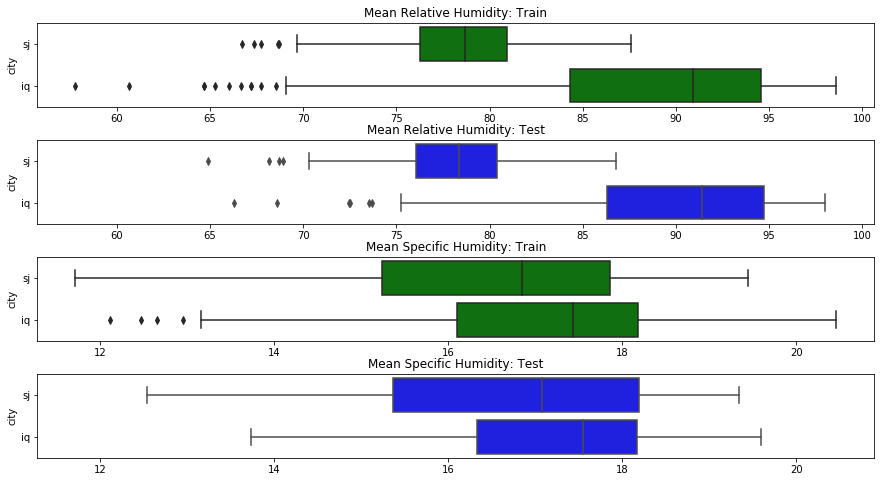

In [21]:
fig = plt.figure(figsize=[15,8])
ax1 = plt.subplot(411)
sns.boxplot(x='reanalysis_relative_humidity_percent', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Mean Relative Humidity: Train')
ax2 = plt.subplot(412, sharex=ax1)
plt.title('Mean Relative Humidity: Test')
sns.boxplot(x='reanalysis_relative_humidity_percent', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)

ax3 = plt.subplot(413)
sns.boxplot(x='reanalysis_specific_humidity_g_per_kg', y='city',
            color='green', data=rawfeats, ax=ax3)
plt.xlabel('')
plt.title('Mean Specific Humidity: Train')

ax4 = plt.subplot(414, sharex=ax3)
plt.title('Mean Specific Humidity: Test')
sns.boxplot(x='reanalysis_specific_humidity_g_per_kg', y='city',
            color='blue', data=testfeats, ax=ax4)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()


## Vegetation Index

#### SJ seems relatively stable whereas IQ has some slight vegetation seasonality

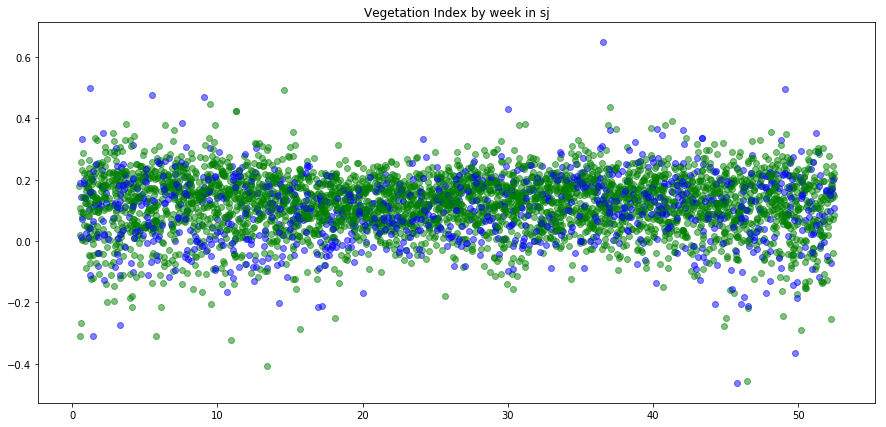

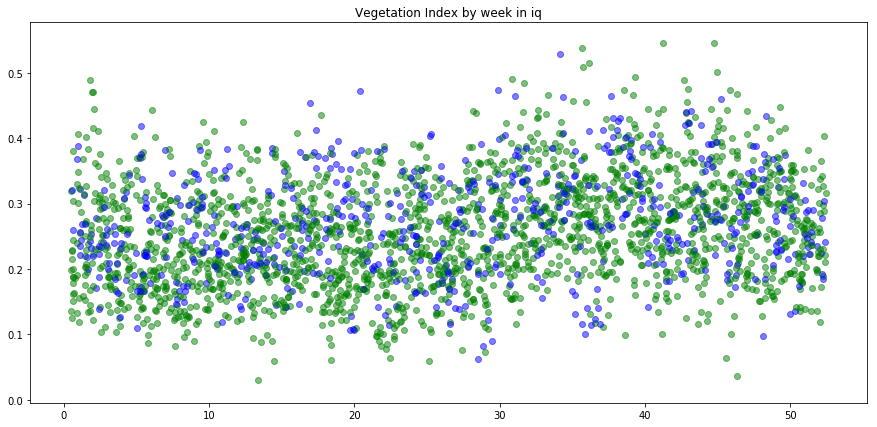

In [22]:
v = ['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']
c = 'sj'

plt.figure(figsize=[15,7])
plt.title('Vegetation Index by week in {}'.format(c))
for pixel in v:
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][pixel], 
            alpha=.5, color='green', label='Training Data')
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][pixel], 
            alpha=.5, color='blue', label='Test Data')
plt.show()

c='iq'
plt.figure(figsize=[15,7])
plt.title('Vegetation Index by week in {}'.format(c))
for pixel in v:
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][pixel], 
            alpha=.5, color='green', label='Training Data')
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][pixel], 
            alpha=.5, color='blue', label='Test Data')
plt.show()

# Training Labels Analysis

In [23]:
rawfeats['total_cases'] = rawlabels.total_cases
sjcorr = (rawfeats[rawfeats.city=='sj']
          .corr()
          .total_cases
          .drop('total_cases', axis=0)
          .sort_values())
iqcorr = (rawfeats[rawfeats.city=='iq']
          .corr()
          .total_cases
          .drop('total_cases', axis=0)
          .sort_values())

#### None of the original features have overly strong correlations with the total cases target variable, but some of the features with clear patterns above do seem to be promising

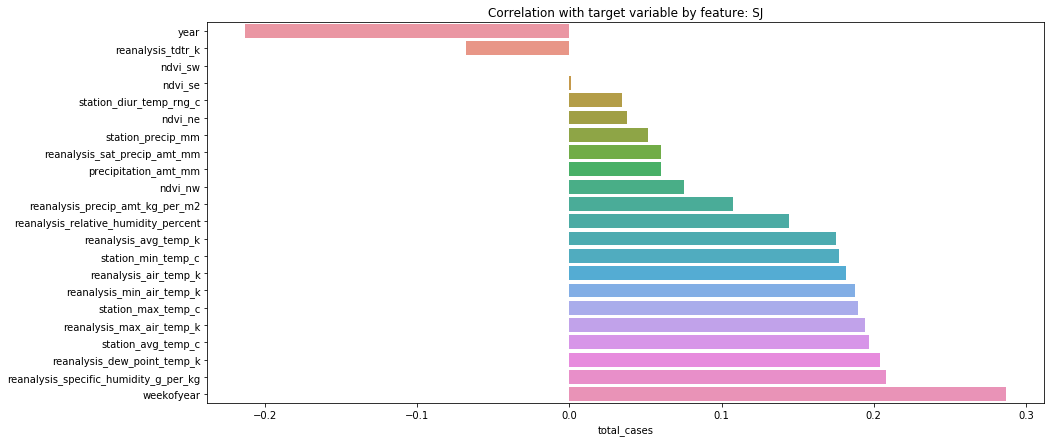

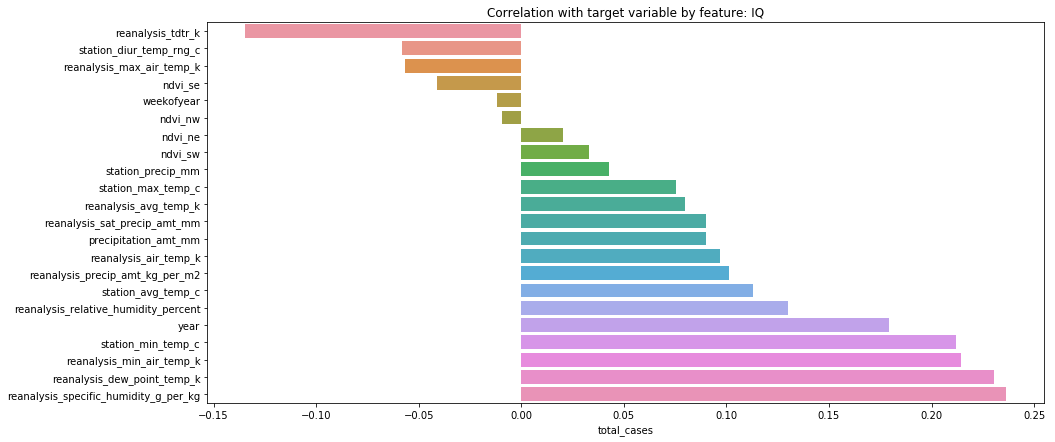

In [24]:
plt.figure(figsize=[15,7])
plt.title('Correlation with target variable by feature: SJ')
sns.barplot(x=sjcorr, y=sjcorr.index)
plt.show()
plt.figure(figsize=[15,7])
plt.title('Correlation with target variable by feature: IQ')
sns.barplot(x=iqcorr, y=iqcorr.index)
plt.show()

### Full Heatmaps

In [25]:
# compute the correlations
sj_correlations = rawfeats[rawfeats.city =='sj'].corr()
iq_correlations = rawfeats[rawfeats.city =='iq'].corr()

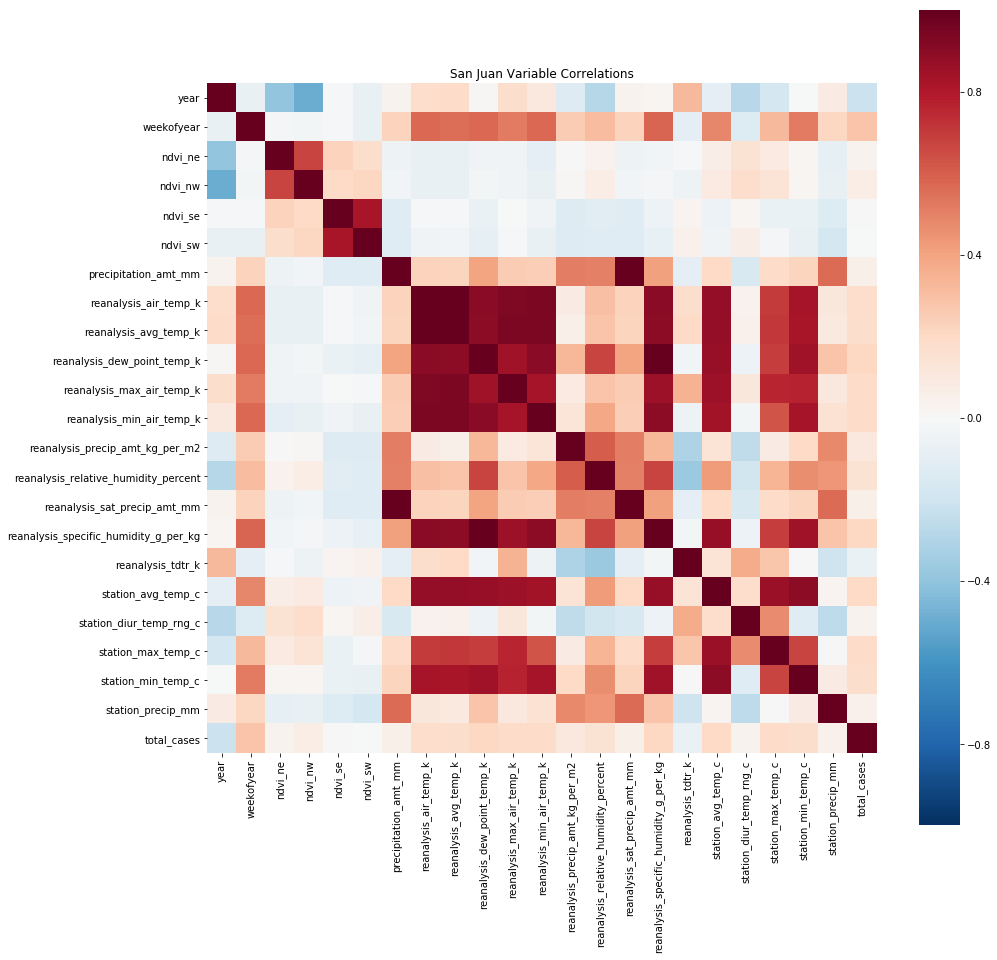

In [26]:
# plot san juan
plt.figure(figsize=[15,15])
sj_corr_heat = sns.heatmap(sj_correlations, 
                square=True, vmin=-1, vmax=1, 
                center=0, cmap='RdBu_r')
plt.title('San Juan Variable Correlations')
plt.show()

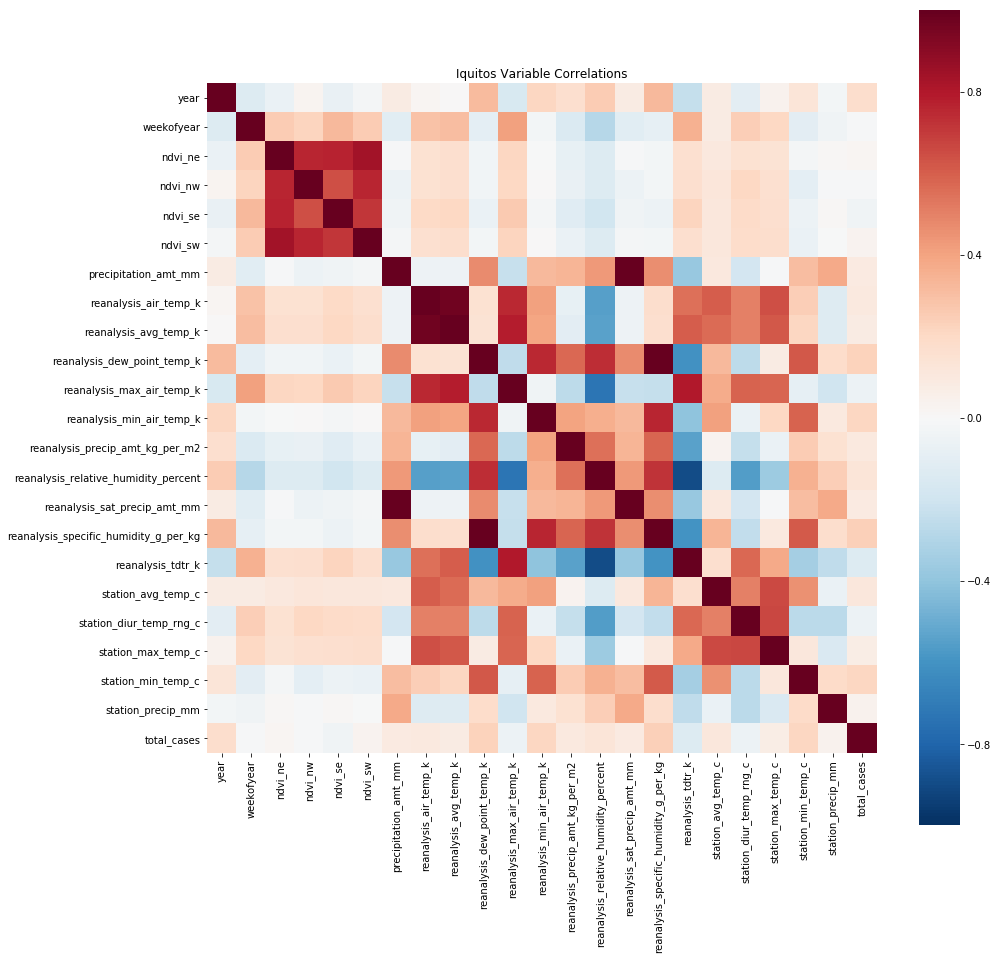

In [27]:
# plot iquitos
plt.figure(figsize=[15,15])
iq_corr_heat = sns.heatmap(iq_correlations, 
                square=True, vmin=-1, vmax=1, 
                center=0, cmap='RdBu_r')
plt.title('Iquitos Variable Correlations')
plt.show()

### Target Variable seasonality

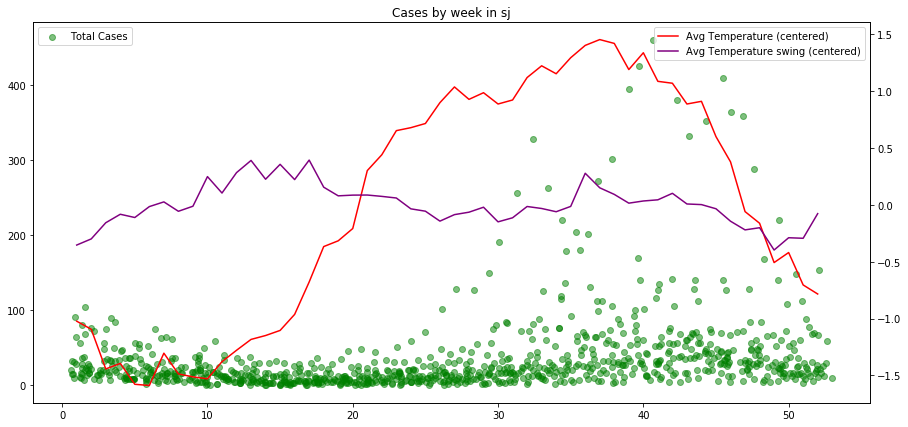

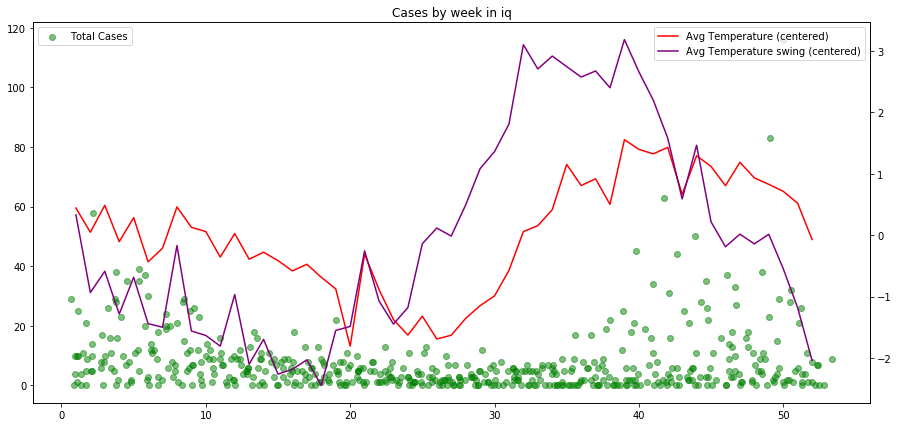

In [75]:
v = 'total_cases'
v2 = 'reanalysis_avg_temp_k'
v3 = 'reanalysis_tdtr_k'
c = 'sj'


fig, ax1 = plt.subplots(figsize=(15,7))
plt.title('Cases by week in {}'.format(c))
ax1.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Total Cases')
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v2].mean() - 
             rawfeats[rawfeats.city==c][v2].mean(),
        label='Avg Temperature (centered)', color='red')
ax2.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v3].mean()- 
             rawfeats[rawfeats.city==c][v3].mean(),
          label='Avg Temperature swing (centered)', color='purple')
ax2.legend(loc=1)
plt.show()

c='iq'
fig, ax1 = plt.subplots(figsize=(15,7))
plt.title('Cases by week in {}'.format(c))
ax1.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Total Cases')
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v2].mean() - 
             rawfeats[rawfeats.city==c][v2].mean(),
        label='Avg Temperature (centered)', color='red')
ax2.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v3].mean()- 
             rawfeats[rawfeats.city==c][v3].mean(),
          label='Avg Temperature swing (centered)', color='purple')
ax2.legend(loc=1)
plt.show()

Symptoms usually begin about four to seven days after the initial infection. Symptoms generally last for about 10 days .

The adult life span can range from two weeks to a month depending on environmental conditions. The life cycle of Aedes aegypti can be completed within one-and-a-half to three weeks.

The eggs of Aedes aegypti may develop in as little as two days in warm climates. Laid eggs can survive for very long periods in a dry state, often for more than a year. However, they hatch immediately once submerged in water. 

After hatching of the eggs, the larvae development is temperature dependent. The larvae pass through four instars, spending a short amount of time in the first three, and up to three days in the fourth instar. Typically this takes about a week. If temperatures are cool, Aedes aegypti can remain in the larval stage for months so long as the water supply is sufficient.

After the fourth instar, the larvae enters the pupal stage. Pupae do not feed and take approximately two days to develop.

 The mosquito is most active during daylight, for approximately two hours after sunrise and several hours before sunset.
 
 Aedes aegypti dwell in tropical and subtropical regions all over the world, mainly between the latitudes of 35°N and 35°S where the winter temperature is no colder than 10°C. 
 
 Aedes aegypti mosquitoes have adapted so that their eggs can survive dry conditions for several months. If eggs are laid in a dry container, new mosquitoes only develop when the container is filled with water. This adaptation has made it very difficult to eliminate mosquito populations completely. In many areas of the world, dengue outbreaks occur every year during the rainy season, when conditions are perfect for mosquito breeding.
 
The meteorological data of the average temperature and precipitation in Vietnam over the last half century seemed appropriate  or explaining this phenomenon (Weatherbase 2009). The average temperature was below 20uC from December to March in the northern  egion and in January in the mountainous region. On the other hand, the temperature was above 24uC throughout the year in the  outhern region. The average lowest temperature, which influenced the distribution of Ae. aegypti (Christophers 1960), was  ifferent among the regions; it was less than 15uC from December to February in the northern region and December in the  ountainous regions, while it was more than 15uC throughout the year in the central and southern regions.
Geographic Distribution of Aedes aegypti and Aedes albopictus
Collected from Used Tires in Vietnam
Author(s): Yukiko Higa, Nguyen Thi Yen, Hitoshi Kawada, Tran Hai Son,
Nguyen Thuy Hoa, and Masahiro Takagi
Source: Journal of the American Mosquito Control Association, 26(1):1-9. 2010.
Published By: The American Mosquito Control Association
DOI: 10.2987/09-5945.1
URL: http://www.bioone.org/doi/full/10.2987/09-5945.1

The likelihood of finding A. aegypti in containers at various locations in Florida increases with the mean temperature and with duration of seasonal dry periods, and decreases with the wetness of a site, whereas the likelihood of finding A. albopictus in containers decreases with temperature and duration of seasonal dry periods, and increases with wetness of the site.

`This article most paid attention to 22C through 24C as the 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2944657/